Une dizaine de données avec un prix bien supérieur à 200 $

Plusieurs données ayant des longitudes et latitudes abhérentes -> retirées

# Notebook sur le kaggle des taxis à N.Y.C

## Importation des données

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import folium
from geopy import distance

In [2]:
data_path=  "data/train_sample.csv"
data_sample = pd.read_csv(data_path)
#data_sample.columns = ["key","fare","pickup_datetime","pickup_longitude",
                       #"pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

In [3]:
data_sample

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-06-17 17:24:31.0000001,57.54,2015-06-17 17:24:31 UTC,-73.803764,40.679134,-73.971626,40.749847,4
1,2009-08-18 17:32:00.000000126,14.50,2009-08-18 17:32:00 UTC,-73.990375,40.756393,-73.956352,40.767413,1
2,2013-08-28 15:13:00.00000042,22.00,2013-08-28 15:13:00 UTC,-73.973278,40.744317,-73.954997,40.813277,1
3,2011-03-04 21:25:00.000000238,5.70,2011-03-04 21:25:00 UTC,-73.971312,40.763847,-73.954757,40.769585,1
4,2014-09-24 16:52:00.00000028,6.00,2014-09-24 16:52:00 UTC,-73.959810,40.782302,-73.969485,40.785452,1
...,...,...,...,...,...,...,...,...
99995,2014-02-09 19:05:00.000000139,8.50,2014-02-09 19:05:00 UTC,-73.990058,40.732362,-73.999953,40.731152,1
99996,2014-10-18 16:50:49.0000003,6.50,2014-10-18 16:50:49 UTC,0.000000,0.000000,0.000000,0.000000,1
99997,2013-03-11 20:20:00.000000140,11.00,2013-03-11 20:20:00 UTC,-73.988802,40.692323,-73.966800,40.705877,2
99998,2013-09-05 09:19:00.000000117,17.00,2013-09-05 09:19:00 UTC,-73.976093,40.750377,-74.009005,40.703882,1


In [191]:
data_sample = data_sample[(data_sample['pickup_latitude'] <=90)
            & (data_sample['pickup_latitude'] >=-90)
            & (data_sample['pickup_longitude'] <=90)
            & (data_sample['pickup_longitude'] >=-90)
            & (data_sample['dropoff_latitude'] <=90)
            & (data_sample['dropoff_latitude'] >=-90)
            & (data_sample['dropoff_longitude'] <=90)
            & (data_sample['dropoff_longitude'] >=-90)
            & (data_sample['dropoff_longitude'] !=0)
            & (data_sample['dropoff_latitude'] !=0)
            & (data_sample['pickup_longitude'] !=0)
            & (data_sample['pickup_latitude'] !=0)
            & (data_sample['fare_amount']>0)]


In [192]:
data_sample

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-08-31 07:05:00.00000067,6.1,2011-08-31 07:05:00 UTC,-73.981517,40.741165,-73.977287,40.754762,2
1,2013-09-24 16:19:02.0000006,17.0,2013-09-24 16:19:02 UTC,-74.002000,40.750713,-73.964212,40.773633,2
2,2014-09-09 07:26:00.000000153,24.5,2014-09-09 07:26:00 UTC,-73.997650,40.683425,-73.958537,40.760137,1
3,2009-10-05 14:51:33.0000001,5.7,2009-10-05 14:51:33 UTC,-74.006147,40.714288,-74.015233,40.711181,1
4,2010-05-27 22:43:00.00000097,6.5,2010-05-27 22:43:00 UTC,-73.976137,40.755605,-73.990392,40.750540,1
...,...,...,...,...,...,...,...,...
523852,2014-03-15 03:28:00.00000070,14.0,2014-03-15 03:28:00 UTC,-74.005272,40.740027,-73.963280,40.762555,1
523853,2009-03-24 20:46:20.0000002,4.2,2009-03-24 20:46:20 UTC,-73.957784,40.765530,-73.951640,40.773959,1
523854,2011-04-02 22:04:24.0000004,14.1,2011-04-02 22:04:24 UTC,-73.970505,40.752325,-73.960537,40.797342,1
523855,2011-10-26 05:57:51.0000002,28.9,2011-10-26 05:57:51 UTC,-73.980901,40.764629,-73.870605,40.773963,1


## Affichage d'une carte

In [193]:
data = pd.DataFrame({
'lat': data_sample['pickup_latitude'][0:50],
'lon': data_sample['pickup_longitude'][0:50],
})
data

m = folium.Map(location=(40.7648,-73.9808),tiles='Stamen Terrain',zoom_start = 12)

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lat'],data.iloc[i]['lon']]).add_to(m)
    
#m.save('./')

In [194]:
m

In [195]:
X_taxi = data_sample.values[:,2:]
Y_taxi = data_sample.values[:,1]

In [196]:
data_sample.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2011-08-31 07:05:00.00000067,6.1,2011-08-31 07:05:00 UTC,-73.981517,40.741165,-73.977287,40.754762,2
1,2013-09-24 16:19:02.0000006,17.0,2013-09-24 16:19:02 UTC,-74.002000,40.750713,-73.964212,40.773633,2
2,2014-09-09 07:26:00.000000153,24.5,2014-09-09 07:26:00 UTC,-73.997650,40.683425,-73.958537,40.760137,1
3,2009-10-05 14:51:33.0000001,5.7,2009-10-05 14:51:33 UTC,-74.006147,40.714288,-74.015233,40.711181,1
4,2010-05-27 22:43:00.00000097,6.5,2010-05-27 22:43:00 UTC,-73.976137,40.755605,-73.990392,40.750540,1


In [197]:
X_taxi_train,Y_taxi_train,X_taxi_train,Y_taxi_train = train_test_split(
        X_taxi,Y_taxi,test_size=0.2,random_state = 0)

In [198]:
X_distance = X_taxi[:,1:5]

In [199]:
X_distance

array([[-73.98151700000001, 40.741165, -73.977287, 40.754762],
       [-74.002, 40.750713, -73.964212, 40.773633000000004],
       [-73.99765, 40.683425, -73.95853699999999, 40.760137],
       ...,
       [-73.970505, 40.752325, -73.960537, 40.797342],
       [-73.980901, 40.764629, -73.870605, 40.773963],
       [-73.96972199999999, 40.797668, -73.970885, 40.783313]],
      dtype=object)

In [200]:
def dist(row):
    coords_1 = (row[1],row[0])
    coords_2 = (row[3],row[2])
    return geopy.distance.distance(coords_1,coords_2).km

In [209]:
distances  = []


for trajet in X_distance:
    distance_trajet = dist(trajet)
    distances.append(distance_trajet)

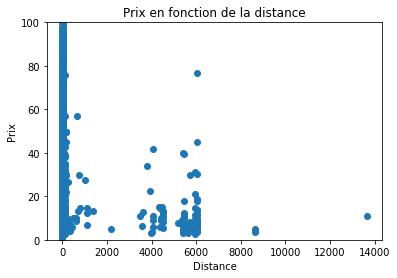

In [210]:
plt.scatter(distances,Y_taxi)
plt.title('Prix en fonction de la distance')
plt.ylim((0,100))
plt.xlabel('Distance')
plt.ylabel('Prix')
plt.show()